# Introduction to Bayesian Statistics

This is a quick introduction to Bayesian statistics. For fuller treatment see: A First Course in Bayesian Statistical Methods by Peter Hoff (full pdf available from TAMU library).

Bayesian statistics has grown in popularity dramatically over the past few decades. Much of this growth has been driven by computing advances (both hardware and algorithms such as MCMC) which have made sophisticated Bayesian models computationally tractable. Quantifying uncertainty in parameters is generally more straightfoward.

The alternative to Bayesian statistics is frequentist statistics. We first introduce a simple Bernoulli model and study it from the (probably more familiar) frequentist perspective. We then go on to discuss the model from a Bayesian perspective.

## Gun Control Example

Suppose $p$ fraction of the population supports more gun control. A survey asks $n=100$ people, "Do you support more gun control." Suppose 70 respond "yes" and 30 respond "no." Our goal is to use this data to estimate $p$ and express some level of confidence about our estimate, such as interval of values we are fairly certain contains $p$.

Supposing that the 100 people were a random selection from the population it is natural to let $X_i = 1$ if the $i^{th}$ person said yes and 0 if the $i^{th}$ person said no. Then
$$ X_i \sim Bernoulli(p)$$.

The bernoulli probability mass function is
$$f(x_i|p) = p^{x_i}(1-p)^{1-{x_i}}$$
For the entire data vector $x=(x_1,\ldots,x_n)$ the probability mass function is
$$f(x_i|p) = p^{\sum x_i}(1-p)^{n-{\sum x_i}}$$



## Frequentist Analysis of Gun Control Survey

In frequentist statistics $p$ is a fixed unknown. Often maximum likelihood is used (although other frequentist methods are available) to estimate $p$. The maximum likelihood estimate for this model is
$$\widehat{p} = \frac{1}{n}\sum_{i=1}^n X_i$$

** Exercise: ** Analytically derive the MLE above by computing the log likelihood, differentiating, setting equal to 0, and solving.

The next step is to quantify uncertainty in this estimate. We usually do this by (approximating) the standard deviation of the estimation. Since this is such a simple model, we can directly compute the variance of the estimator
$$Var(\widehat{p}) = \frac{p(1-p)}{n} \approx \frac{\widehat{p}(1-\widehat{p})}{n}$$.

** Exercise: ** Derive the variance result above.

By the central limit theorem $\widehat{p}$ is asymptotically normal (or by appealing to arguments about normality for MLEs), so 
$$ \sqrt{n}(\widehat{p} - p) \rightarrow_d N(0,p(1-p))$$
and a 95% approximate confidence interval is
$$\widehat{p} \pm 1.96\sqrt{\frac{\widehat{p}(1-\widehat{p})}{n}}$$

For our particular example $\widehat{p} = 0.70$ and a 95% CI is
$$ 0.7 \pm 0.09 \text{ or } [0.61,0.79]$$
The interpretation of the 95% confidence interval is complicated. It is tempting to say there is a 95% chance that $p$ is in this interval. This is incorrect. Instead we say that if we repeated the data collection process over and over again, about 95% of 95% confidence intervals will contain the true parameter value $p$. 

** Exercise: ** Verify the confidence interval calculation.

** Exercise: ** Redo the estimate $p$ and the confidence interval calculation with $n=1000$ and 700 people saying yes. How are the results different / the same and why?

** Exercise: ** Run a simulation study to verify that about 95% of 95% confidence intervals contain the true parameter value. (This is very similar to Homework 1, Question 2.)

## Bayesian Statistics

In Bayesian statistics the parameter $p$ is unknown. A **prior distribution** reflects our beliefs about $p$ before collecting any data. In the gun control example, this could be based on the results of previous polls combined with the fact that opinions change over time. For example if 1 year ago in a poll 57% supported gun control, we might want a prior distribution for $p$ that is centered near $0.57$ but accounts for the fact that $p$ could be fairly far from this number due to changes in people's opinion and the fact that the poll result has uncertainty in it. Alternatively we may not feel we have any idea about $p$ in which case we choose an **uninformative prior** on $p$ which attempts to have limited influence on the estimator. It is best to learn about these ideas through examples.

We call the prior distribution $\pi(p)$. Then Bayes theorem says that the posterior distribution, the probability of the parameter **after** seeing the data is
$$\pi(p|x) = \frac{f(x|p)\pi(p)}{\int_p f(x|p)\pi(p) dp}$$
The posterior updates our beliefs expressed in the prior with whatever the data is telling us in $f(x|p)$. It is important to note that the $p$ in the denominator is a dummy variable and that the denominator does not depend on $p$. Thus we can define the denominator as $m(x)$ and write
$$\pi(p|x) = \frac{f(x|p)\pi(p)}{m(x)}$$
or say that
$$\pi(p|x) \propto f(x|p)\pi(p).$$

### Prior for Bayesian Analysis of Gun Control Survey 

We express our prior belief about $p$ using a $Beta(\alpha,\beta)$ distribution. This prior has the form
$$\pi(p) = \frac{1}{B(\alpha,\beta)} p^{\alpha-1}(1-p)^{\beta-1}$$
where $B(\alpha,\beta)$ is a normalizing constant (does not depend on $p$). We discuss why we use this form later. $\alpha$ and $\beta$ are fixed constants which we choose so that $\pi$ accurately represents our prior belief. Below we plot the $Beta(\alpha,\beta)$ density for several values of $\alpha$ and $\beta$.

In [3]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

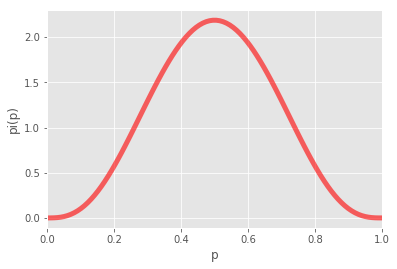

In [4]:
al = 4 ## alpha parameter
be = 4 ## beta parameter
p = np.linspace(0,1, 100)
fig = plt.figure()
ax = plt.axes()
ax.plot(p, beta.pdf(p, al, be),
         'r-', lw=5, alpha=0.6, label='beta pdf')
ax.set(xlim=(0, 1),xlabel='p', ylabel='pi(p)');

If we believe that $p$ is near $0.6$ (before seeing the data), we could set $\alpha=6$ and $\beta=4$.

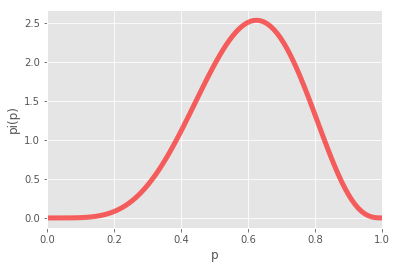

In [5]:
al = 6 ## alpha parameter
be = 4 ## beta parameter
p = np.linspace(0,1, 100)
fig = plt.figure()
ax = plt.axes()
ax.plot(p, beta.pdf(p, al, be),
         'r-', lw=5, alpha=0.6, label='beta pdf')
ax.set(xlim=(0, 1),xlabel='p', ylabel='pi(p)');

If we believe that $p$ is **very** near $0.6$ (before seeing the data), we could set $\alpha=60$ and $\beta=40$.

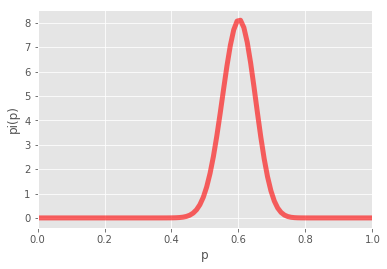

In [6]:
al = 60 ## alpha parameter
be = 40 ## beta parameter
p = np.linspace(0,1, 100)
fig = plt.figure()
ax = plt.axes()
ax.plot(p, beta.pdf(p, al, be),
         'r-', lw=5, alpha=0.6, label='beta pdf')
ax.set(xlim=(0, 1),xlabel='p', ylabel='pi(p)');

** Exercise: ** Adjust the $\alpha$ and $\beta$ parameters to create other prior distributions. Try to create a "flat" prior which equals 1 for all values between $0$ and $1$. Try to create a prior which puts a lot of probability near 0. You can read more about the Beta distribution on [wikipedia](https://en.wikipedia.org/wiki/Beta_distribution) to help you answer these questions.

### Posterior for Bayesian Analysis of Gun Control Survey 

Suppose $\alpha=\beta=4$ in the Beta distribution accurately represents our prior belief about $p$. It would be best to choose this before any analysis of the data. Then the posterior distribution is
$$\pi(p|x) \propto p^{\sum x_i} (1-p)^{n-\sum x_i}\frac{1}{B(\alpha,\beta)}p^{\alpha-1}(1-p)^{\beta-1}$$

We now plot the prior and the posterior.

In [7]:
## get plot sizes reasonable
plt.rcParams['figure.figsize'] = (11, 3)

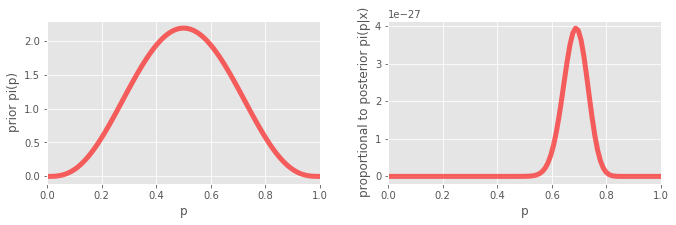

In [8]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=.25)

al = 4 ## alpha parameter
be = 4 ## beta parameter
p = np.linspace(0,1, 100)

### plot the prior
ax = fig.add_subplot(1, 2, 1)
ax.plot(p, beta.pdf(p, al, be),
         'r-', lw=5, alpha=0.6, label='beta pdf')
ax.set(xlim=(0, 1),xlabel='p', ylabel='prior pi(p)');

### plot the posterior
ax = fig.add_subplot(1, 2, 2)
ax.plot(p, beta.pdf(p, al, be)*np.power(p,70)*np.power(1.0-p,30),
         'r-', lw=5, alpha=0.6, label='beta pdf')
ax.set(xlim=(0, 1),xlabel='p', ylabel='proportional to posterior pi(p|x)');

We see that the posterior is now concentrated around 0.7 reflecting the fact that our prior belief has been strongly shifted by the data. Note that the y-axis values for the posterior are unnormalized. The total area under the curve must be one, so we could normalized the posterior by integrating the function.

The degree to which the data shifts the prior depends on how much information is in the prior versus how much data we have. More data means the prior will have less influence.

Consider starting with a prior concentrated near 0.2.

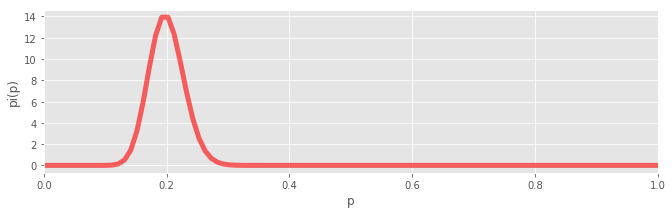

In [9]:
al = 40 ## alpha parameter
be = 160 ## beta parameter
p = np.linspace(0,1, 100)


fig = plt.figure()
ax = plt.axes()
ax.plot(p, beta.pdf(p, al, be),
         'r-', lw=5, alpha=0.6, label='beta pdf')
ax.set(xlim=(0, 1),xlabel='p', ylabel='pi(p)');

Now compute the posterior, assuming we had the same data (70 say yes and 30 say no).

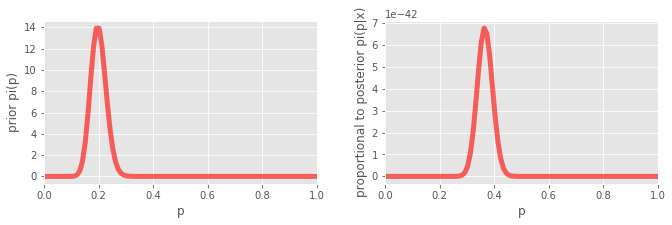

In [10]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=.25)

al = 40 ## alpha parameter
be = 160 ## beta parameter
p = np.linspace(0,1, 100)

### plot the prior
ax = fig.add_subplot(1, 2, 1)
ax.plot(p, beta.pdf(p, al, be),
         'r-', lw=5, alpha=0.6, label='beta pdf')
ax.set(xlim=(0, 1),xlabel='p', ylabel='prior pi(p)');

### plot the posterior
ax = fig.add_subplot(1, 2, 2)
ax.plot(p, beta.pdf(p, al, be)*np.power(p,70)*np.power(1.0-p,30),
         'r-', lw=5, alpha=0.6, label='beta pdf')
ax.set(xlim=(0, 1),xlabel='p', ylabel='proportional to posterior pi(p|x)');

We see that the posterior still strongly reflects the prior in that the probability of $p$ near 0.7 is very small. 